In [56]:
import requests
import pandas as pd
from pprint import pprint
import re
import matplotlib.pyplot as plt
import numpy as np


movies = ["tt0381061", "tt0482571", "tt1232829", "tt1853728", "tt0993846", "tt0314331", "tt0362227", "tt0446029", "tt1631867","tt0841032",
"tt0266543",
"tt0371746",
"tt1219827",
"tt0317919",
"tt0373889",
"tt0488120",
"tt0414993",
"tt0325980",
"tt0367882",
"tt0337978",
"tt0371746",
"tt0482571",
"tt0417741",
"tt0253474",
"tt0362227",
"tt0480249",
"tt0328107",
"tt0383574",
"tt0414055",
"tt0458481",
"tt0338013",
"tt0286716",
"tt0253474",
"tt0362227",
"tt0417741",
"tt0371746",
"tt0482571",
"tt0327056",
"tt0266543",
"tt0465234",
"tt0246578",
"tt0372784",
"tt0496806",
"tt0325980",
"tt0264464",
"tt0405422",
"tt0480249",
"tt0414852",
"tt0330373",
"tt0365748",
"tt0363163",
"tt0417741",
"tt0332452",
"tt0278504",
"tt0480249",
"tt0372183",
"tt0289879",
"tt0422295",
"tt0382932",
"tt0449088",
"tt0371746",
"tt0405422",
"tt1210819",
"tt0780653",
"tt0413300",
"tt0816692",
"tt0329691",
"tt0417741",
"tt0482571",
"tt0338013",
"tt0325980",
"tt0413300",
"tt0482571",
"tt0371246",
"tt0245429",
"tt0363163",
"tt0330373",
"tt0399295",
"tt0467406",
"tt0425210",
"tt0371746",
"tt1232829",
"tt0399295",
"tt0489099",
"tt0362227",
"tt0328107",
"tt0405422",
"tt0299930",
"tt0417741",
"tt0275847",
"tt0330373",
"tt0241527",
"tt0379786",
"tt0480249",
"tt0289879",
"tt0362227",
"tt0411008",
"tt0397313",
"tt0295297",
"tt0275847",
"tt0347149",
"tt0477348",
"tt0259711",
"tt0405508",
"tt0371746",
"tt0286716",
"tt0486655",
"tt0362227",
"tt0328107",
"tt0249462",
"tt0245429",
"tt0371746",
"tt0289879",
"tt0322259",
"tt0259711",
"tt0290334",
"tt0333766",
"tt0265086",
"tt0388795",
"tt0362227",
"tt0245429",
"tt0482571",
"tt0362165",
"tt0298148",
"tt0414993",
"tt0381707",
"tt0373889",
"tt0328107",
"tt0478087",
"tt0448124",
"tt0266543",
"tt0371746",
"tt0405422",
"tt0482571",
"tt0848228",
"tt1232829",
"tt1528100",
"tt1895587",
"tt2076822",
"tt2278388",
"tt0266543",
"tt0361862",
"tt0405159",
"tt0482571",
"tt0498399",
"tt0770828",
"tt0905372",
"tt1170358",
"tt1216475",
"tt1838556",
"tt0289879",
"tt0499448",
"tt0325710",
"tt0413267",
"tt0362478",
"tt0482571",
"tt0332452",
"tt0448124",
"tt0401855",
"tt0373889",
"tt0313542",
"tt0277296",
"tt0259324",
"tt0372784",
"tt0382932",
"tt0246578",
"tt0405422",
"tt0338013",
"tt0246578",
"tt0322259",
"tt0338013",
"tt0299977",
"tt0413300",
"tt0482571",
"tt0363771",
"tt0383574",
"tt0258463",
"tt0327056",
"tt0371746",
"tt0429589",
"tt0371746",
"tt0246578",
"tt1219289",
"tt0383574",
"tt0405422",
"tt0413300",
"tt0314331",
"tt0480249",
"tt0417741",
"tt0264464",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396"]
movie_data = []

url = "https://movie-database-alternative.p.rapidapi.com/"

headers = {
    "X-RapidAPI-Key": "28e2262193mshd21fe66492c0292p170312jsna28acf2a4ffb",
    "X-RapidAPI-Host": "movie-database-alternative.p.rapidapi.com"
}

for movie in movies:
    querystring = {"r":"json","i":movie}

    try:
        response = requests.get(url, headers=headers, params=querystring).json()
    
        title = response['Title']
        year = response['Year']
        awards_rough = response['Awards']
        ratings_rough = response['Ratings']

        box_office = response['BoxOffice']
        box_office = box_office.replace("$", "")
        box_office = box_office.replace(",", "")
        box_office = float(box_office)

        runtime = response['Runtime']
        temp = runtime.split(" min")
        runtime = int(temp[0])

        imdb = ratings_rough[0]['Value']
        temp = imdb.split("/")
        imdb = int(float(temp[0]) * 10)

        rotten_tomatoes = ratings_rough[1]['Value']
        temp = rotten_tomatoes.split("%")
        rotten_tomatoes = int(temp[0])

        metacritic = ratings_rough[2]['Value']
        temp = metacritic.split("/")
        metacritic = int(temp[0])
    
        nums = re.findall(r'\d+', awards_rough)
        noms = int(nums[len(nums)-1])
        if len(nums) > 1:
            wins = int(nums[len(nums)-2])
        else:
            wins = 0

        movie_data.append({"Title": title,
                        "Year": year,
                        "Runtime": runtime,
                        "Box Office": box_office,
                        "IMDb": imdb,
                        "Rotten Tomatoes": rotten_tomatoes,
                        "Metacritic": metacritic,
                        "Nominations": noms,
                        "Wins": wins,})
    except:
        print("Movie not found. Skipping...")
        pass
    
movie_data_df = pd.DataFrame(movie_data)
movie_data_df.head()

Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...


,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37


In [89]:
movie_data_df.count()

Title                           194
Year                            194
Runtime                         194
Box Office                      194
IMDb                            194
Rotten Tomatoes                 194
Metacritic                      194
Nominations                     194
Wins                            194
Runtime Bucket (mins)           194
Box Office Income (millions)    193
dtype: int64

In [58]:
movie_data_df

,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37
...,...,...,...,...,...,...,...,...,...
189,Harry Potter and the Sorcerer's Stone,2001,152,318886962.0,76,81,65,69,19
190,Batman Begins,2005,140,206863479.0,82,84,70,79,14
191,The Terminal,2004,128,77872883.0,74,61,55,8,7
192,Sunshine,2007,107,3675753.0,72,76,64,23,1


In [64]:
average_runtime = movie_data_df["Runtime"].mean()
average_boxoffice = movie_data_df["Box Office"].mean()
average_wins = movie_data_df["Wins"].mean()
average_nominations = movie_data_df["Nominations"].mean()
average_Rotten_tomatoes_score = movie_data_df["Rotten Tomatoes"].mean()
average_Metacritic = movie_data_df["Metacritic"].mean()
average_IMDb = movie_data_df["IMDb"].mean()
total_movies = movie_data_df["Title"].nunique()

In [65]:
summary_movie_data = pd.DataFrame({"Total Number of Movies":total_movies,
                       "Average Runtime":average_runtime,
                       "Average Box Office": average_boxoffice, 
                       "Average Wins":average_wins,
                       "Average Nominations":average_nominations,
                       "Average Rotten Tomatoes Score":average_Rotten_tomatoes_score,
                        "Average Metacritic Scores":average_Metacritic,
                        "Average IMDb Scores": average_IMDb}, index=[1])
summary_movie_data

,Total Number of Movies,Average Runtime,Average Box Office,Average Wins,Average Nominations,Average Rotten Tomatoes Score,Average Metacritic Scores,Average IMDb Scores
1,104,125.221649,1.436169e+08,18.350515,40.180412,70.541237,65.634021,73.814433


In [59]:
movie_lengths = [0, 90, 120, 150, 180, 210]
length_labels = ["< 90", "90 - 119", "120 - 149", "150 - 179", "> 180"]


In [112]:

movie_data_df['Runtime Bucket (mins)'] = pd.cut(movie_data_df['Runtime'],bins,labels=length_labels)

movie_data_df.head(25)


,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins),Box Office Income (millions)
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 - 149,150-200
1,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 - 149,50-100
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119,100- 150
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179,150-200
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179,100- 150
5,Love Actually,2003,135,59696144.0,76,64,55,29,10,120 - 149,50-100
6,The Terminal,2004,128,77872883.0,74,61,55,8,7,120 - 149,50-100
7,Scott Pilgrim vs. the World,2010,112,33281690.0,75,82,69,65,18,90 - 119,0 to 50
8,Edge of Tomorrow,2014,113,100206256.0,79,91,71,38,11,90 - 119,100- 150
9,The Perfect Holiday,2007,96,5812781.0,47,19,32,2,0,90 - 119,0 to 50


C:\Users\micha\AppData\Local\Temp\ipykernel_39792\1781383818.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runtime_data = movie_data_df.groupby('Runtime Bucket (mins)').sum()['Wins']


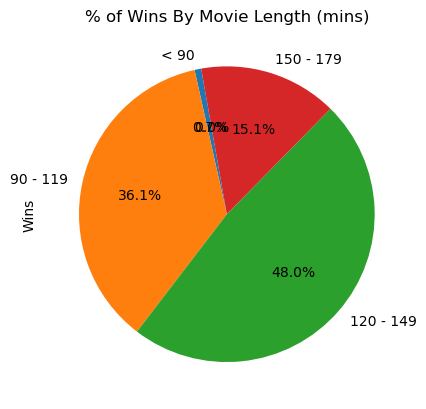

<bound method Series.info of Runtime Bucket (mins)
< 90           26
90 - 119     1285
120 - 149    1710
150 - 179     539
> 180           0
Name: Wins, dtype: int64>

In [108]:
runtime_data = movie_data_df.groupby('Runtime Bucket (mins)').sum()['Wins']

runtime_data.plot(kind='pie',y='', autopct='%1.1f%%', startangle=100, shadow =False)
plt.title('% of Wins By Movie Length (mins)')
plt.show()

runtime_data.info